### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos:** Casos totais registrados até a data
- **casos_novos:** Casos novos registrados na data
- **obitos:** Óbitos totais registrados até a data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('IBM_Employees.csv')

In [3]:
df1['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [4]:
df2 = pd.read_csv('dados_covid_sp_20.csv')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225 entries, 0 to 3224
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome_munic    3225 non-null   object 
 1   codigo_ibge   3225 non-null   int64  
 2   nome_drs      3225 non-null   object 
 3   cod_drs       3225 non-null   float64
 4   pop           3225 non-null   float64
 5   pop_60        3225 non-null   float64
 6   ano_mes       3225 non-null   object 
 7   casos         3225 non-null   int64  
 8   casos_novos   3225 non-null   int64  
 9   obitos        3225 non-null   int64  
 10  obitos_novos  3225 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 277.3+ KB


## Exercício 1:
Utilizando a base de dados da IBM:

**a)** Faça um gráfico de dispersão (scatter plot) com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" e determine o tamanho da imagem como (10,5).

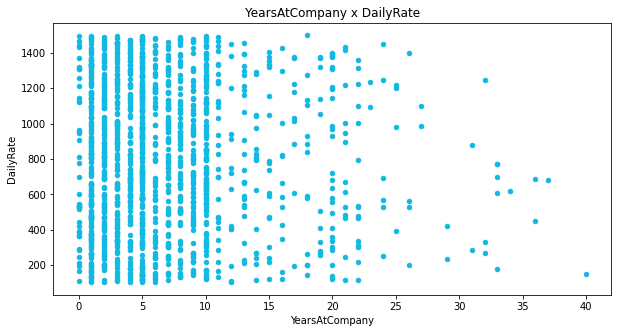

In [6]:
df1.plot(x= 'YearsAtCompany', y ='DailyRate', kind='scatter',\
         color ='#12b9e3', figsize=(10,5),\
         title ='YearsAtCompany x DailyRate');

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

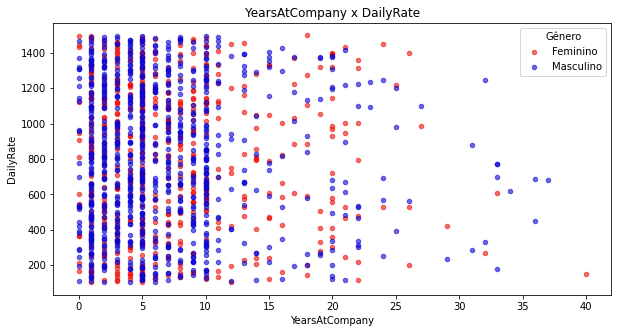

In [7]:
ax1 =df1[df1['Gender']=='Female'].plot(x= 'YearsAtCompany', y ='DailyRate',\
                                       kind='scatter', color ='#ed0c05', figsize=(10,5),\
                                       title ='YearsAtCompany x DailyRate', alpha= 0.6, \
                                       label= 'Feminino')
ax2 =df1[df1['Gender']=='Male'].plot(x= 'YearsAtCompany', y ='DailyRate',\
                                     kind='scatter', color ='#0b04d4',\
                                     label= 'Masculino', alpha= 0.6, ax= ax1)    
ax1.legend(title='Gênero');


**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 



In [8]:
dict_satisfaction = {1 : ['Baixa', '#FFE4E1'],
                      2 : ['Média', '#FFB6C1'],
                      3 : ['Alta', '#FF69B4'], 
                      4 : ['Muito Alta', '#C71585']}

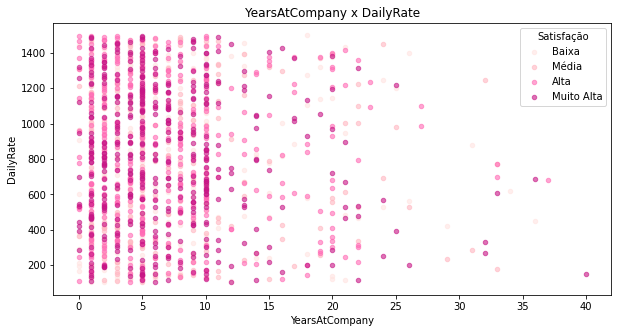

In [9]:

for satisfaction in dict_satisfaction:
    if  satisfaction== 1:
        ax1 = df1[df1['JobSatisfaction']== satisfaction].plot(x= 'YearsAtCompany', y ='DailyRate',\
                                          kind='scatter', color = dict_satisfaction[satisfaction][1], figsize=(10,5),\
                                          title ='YearsAtCompany x DailyRate', alpha= 0.6, \
                                          label= dict_satisfaction[satisfaction][0])
    else:
        ax2 = df1[df1['JobSatisfaction']== satisfaction].plot(x= 'YearsAtCompany', y ='DailyRate',\
                                      kind='scatter', color = dict_satisfaction[satisfaction][1], figsize=(10,5),\
                                      title ='YearsAtCompany x DailyRate', alpha= 0.6, \
                                      label= dict_satisfaction[satisfaction][0], ax= ax1)
ax1.legend(title='Satisfação');


**d)** Observando os gráficos desenhados, você diria que o tempo na empresa, o gênero e/ou a satisfação no trabalho tem relação com o gasto diário com o colaborador?

In [10]:
# Não, embora não tenha sido realizados cálculos de correlação,
# se pode observar que os dados estão dispersos, para categorias plotadas.

## Exercício 2

**a)** Utilizando a base de dados de covid, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

In [11]:
cities_drs= ['Grande São Paulo', 'São José do Rio Preto', 'Marília']

In [12]:
line_drs = pd.DataFrame()
for drs in cities_drs:
    print(drs)
    line_drs = line_drs.append(df2[df2['nome_drs'] == drs])
line_drs

Grande São Paulo
São José do Rio Preto
Marília


/tmp/ipykernel_47714/3570399108.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  line_drs = line_drs.append(df2[df2['nome_drs'] == drs])
/tmp/ipykernel_47714/3570399108.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  line_drs = line_drs.append(df2[df2['nome_drs'] == drs])
/tmp/ipykernel_47714/3570399108.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  line_drs = line_drs.append(df2[df2['nome_drs'] == drs])


,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
185,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-02,0,0,0,0
186,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-03,7,2,0,0
187,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-04,610,52,31,2
188,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-05,4518,194,295,16
189,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-06,1059,30,73,1
...,...,...,...,...,...,...,...,...,...,...,...
3220,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-02,0,0,0,0
3221,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-03,0,0,0,0
3222,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-04,0,0,0,0
3223,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-05,0,0,0,0


In [13]:
line_drs = line_drs.groupby(['nome_drs', 'ano_mes'],  as_index=False).sum()
line_drs

,nome_drs,ano_mes,codigo_ibge,cod_drs,pop,pop_60,casos,casos_novos,obitos,obitos_novos
0,Grande São Paulo,2020-02,137642196,390.0,21138247.0,3056864.0,7,1,0,0
1,Grande São Paulo,2020-03,137642196,390.0,21138247.0,3056864.0,11652,2186,597,132
2,Grande São Paulo,2020-04,137642196,390.0,21138247.0,3056864.0,323484,22094,24398,1879
3,Grande São Paulo,2020-05,137642196,390.0,21138247.0,3056864.0,1545196,60332,125447,4359
4,Grande São Paulo,2020-06,137642196,390.0,21138247.0,3056864.0,272373,9631,20090,509
5,Marília,2020-02,218755091,310.0,1109670.0,200936.0,0,0,0,0
6,Marília,2020-03,218755091,310.0,1109670.0,200936.0,0,0,0,0
7,Marília,2020-04,218755091,310.0,1109670.0,200936.0,786,82,73,9
8,Marília,2020-05,218755091,310.0,1109670.0,200936.0,7371,363,499,14
9,Marília,2020-06,218755091,310.0,1109670.0,200936.0,1548,64,80,2


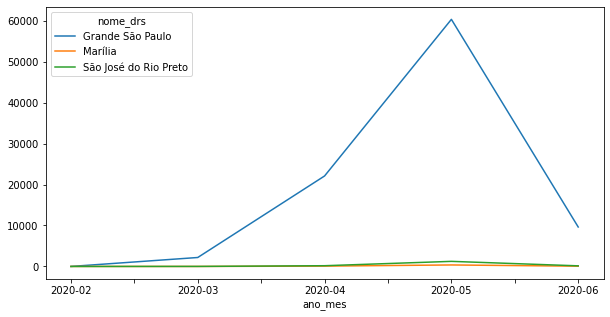

In [16]:
ax= line_drs.pivot(index='ano_mes', columns='nome_drs', 
             values='casos_novos').plot(figsize=(10,5), kind='line')

**b)** Repita o gráfico do item a trocando as cores dos DRS.

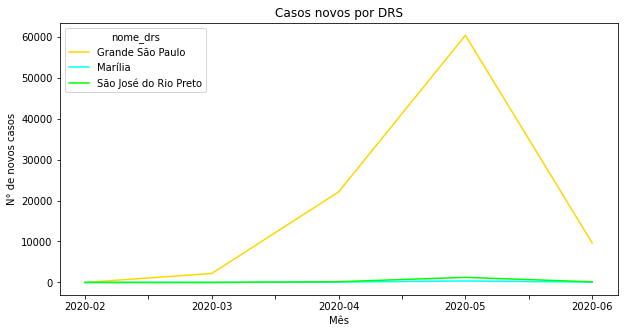

In [18]:
ax= line_drs.pivot(index='ano_mes', columns='nome_drs', 
             values='casos_novos').plot(figsize=(10,5), kind='line', title='Casos novos por DRS',
                                                    color={'Grande São Paulo' : 'gold',
                                                       'São José do Rio Preto' : 'lime',
                                                       'Marília': 'cyan'});
ax.set_xlabel('Mês')
ax.set_ylabel('N° de novos casos');

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

In [40]:
cities_drs= [ 'Bauru', 'São José do Rio Preto', 'Marília']

In [41]:
pie_drs = pd.DataFrame()
for drs in cities_drs:
    print(drs)
    pie_drs = pie_drs.append(df2[df2['nome_drs'] == drs])
pie_drs

Bauru
São José do Rio Preto
Marília


/tmp/ipykernel_47714/1814051528.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_drs = pie_drs.append(df2[df2['nome_drs'] == drs])
/tmp/ipykernel_47714/1814051528.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_drs = pie_drs.append(df2[df2['nome_drs'] == drs])
/tmp/ipykernel_47714/1814051528.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_drs = pie_drs.append(df2[df2['nome_drs'] == drs])


,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
15,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-02,0,0,0,0
16,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-03,0,0,0,0
17,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-04,152,15,23,1
18,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-05,617,8,31,0
19,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-06,108,9,4,0
...,...,...,...,...,...,...,...,...,...,...,...
3220,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-02,0,0,0,0
3221,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-03,0,0,0,0
3222,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-04,0,0,0,0
3223,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-05,0,0,0,0


In [42]:
pie_drs = pie_drs.groupby(['nome_drs', 'ano_mes'],  as_index=False).sum()
pie_drs

,nome_drs,ano_mes,codigo_ibge,cod_drs,pop,pop_60,casos,casos_novos,obitos,obitos_novos
0,Bauru,2020-02,239634022,816.0,1741281.0,287181.0,0,0,0,0
1,Bauru,2020-03,239634022,816.0,1741281.0,287181.0,2,2,0,0
2,Bauru,2020-04,239634022,816.0,1741281.0,287181.0,3303,325,326,26
3,Bauru,2020-05,239634022,816.0,1741281.0,287181.0,27175,1256,1470,49
4,Bauru,2020-06,239634022,816.0,1741281.0,287181.0,5617,251,260,4
5,Marília,2020-02,218755091,310.0,1109670.0,200936.0,0,0,0,0
6,Marília,2020-03,218755091,310.0,1109670.0,200936.0,0,0,0,0
7,Marília,2020-04,218755091,310.0,1109670.0,200936.0,786,82,73,9
8,Marília,2020-05,218755091,310.0,1109670.0,200936.0,7371,363,499,14
9,Marília,2020-06,218755091,310.0,1109670.0,200936.0,1548,64,80,2


In [45]:
df_pie = pie_drs[pie_drs['ano_mes'].isin(['2020-04', '2020-05', '2020-06'])]
df_pie

,nome_drs,ano_mes,codigo_ibge,cod_drs,pop,pop_60,casos,casos_novos,obitos,obitos_novos
2,Bauru,2020-04,239634022,816.0,1741281.0,287181.0,3303,325,326,26
3,Bauru,2020-05,239634022,816.0,1741281.0,287181.0,27175,1256,1470,49
4,Bauru,2020-06,239634022,816.0,1741281.0,287181.0,5617,251,260,4
7,Marília,2020-04,218755091,310.0,1109670.0,200936.0,786,82,73,9
8,Marília,2020-05,218755091,310.0,1109670.0,200936.0,7371,363,499,14
9,Marília,2020-06,218755091,310.0,1109670.0,200936.0,1548,64,80,2
12,São José do Rio Preto,2020-04,360255048,1530.0,1570421.0,291350.0,2625,178,172,12
13,São José do Rio Preto,2020-05,360255048,1530.0,1570421.0,291350.0,22036,1241,973,45
14,São José do Rio Preto,2020-06,360255048,1530.0,1570421.0,291350.0,4569,148,193,9


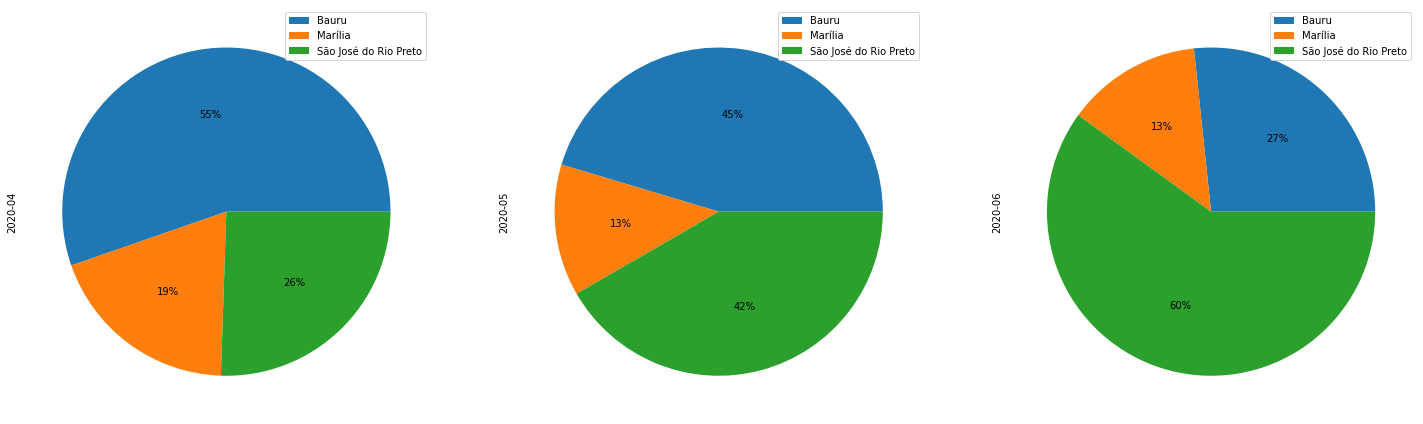

In [51]:
ax= df_pie.pivot(index='nome_drs', columns='ano_mes', 
                 values='obitos_novos').plot(figsize=(25,15), kind='pie',
                                             subplots = True,
                                             labeldistance=None,
                                            autopct='%1.0f%%');